# Two-layer Neural Network using TensorFlow 2 on Iris Dataset
##  CPE 490 590
### Author: Rahul Bhadani

In [1]:
!pip install pydot

In [2]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)


2024-03-04 16:07:09.005395: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 16:07:09.007899: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 16:07:09.036910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 16:07:09.036931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 16:07:09.037850: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


# Load the Iris Dataset

In [4]:
import pandas as pd
# load dataset
Iris = pd.read_csv("Dataset/Iris/iris.data")
Iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
Iris.shape

(150, 5)

# Extract Features and Class (Labels)

In [6]:
X = Iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
Labels = Iris[["Class"]]

In [7]:
X.shape

(150, 4)

In [8]:
Labels

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Split into Training and Test Dataset

In [9]:
# Split the dataset into training and test sets
X_train, X_test, y_train_label, y_test_label = train_test_split(X, Labels, test_size=0.2, random_state=42)

# Scale The Features

In [10]:
# Standardize the features to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Convert class vectors to binary class matrices (for use in categorical_crossentropy)

In [11]:
# Reshape y_train and y_test to be 1D arrays
y_train_label = np.ravel(y_train_label)
y_test_label = np.ravel(y_test_label)

# Now you can fit and transform without warnings
encoder = LabelEncoder()
encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)
y_test = encoder.transform(y_test_label)

# Construct a Neural Network


## This line initializes a new sequential model in Keras. A sequential model is a linear stack of layers where you can add one layer at a time.

In [12]:
# Define the model
model = Sequential()

2024-03-04 16:07:11.416669: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## This line adds the first layer to the model. This layer is a dense (or fully connected) layer, which means each neuron in this layer is connected to all neurons in the previous layer. The layer has 64 neurons (or units), and the input_dim=4 parameter indicates that the input to this layer is expected to be four-dimensional vectors. The activation function for this layer is ReLU (Rectified Linear Unit). The ReLU function is an activation function that outputs the input directly if it is positive; otherwise, it outputs zero.

### In this code, HeNormal() creates a new He normal initializer, which initializes the weights of the layer with values drawn from a truncated normal distribution centered on 0, with stddev = sqrt(2 / fan_in), where fan_in is the number of input units in the weight tensor.

In [13]:
from tensorflow.keras.initializers import HeNormal

model.add(Dense(64, input_dim=X.shape[1], activation='relu', kernel_initializer=HeNormal()))


## This line adds the second layer to the model, which is also a dense layer with 64 neurons. The activation function is again ReLU. Since this is not the first layer in the model, we don’t need to specify input_dim as Keras infers it from the output of the previous layer.

In [14]:
model.add(Dense(64, activation='relu'))  # Layer 2

## This line adds the output layer to the model. This layer is also a dense layer and it has 3 neurons, corresponding to the 3 classes of the Iris dataset. The activation function is softmax, which is often used in the output layer of a classifier. The softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. It’s a way of normalizing the output of a network to a probability distribution over predicted output classes.

In [15]:
model.add(Dense(3, activation='softmax'))  # Output layer

# Compile the model


In [16]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=SGD(), 
              metrics=['accuracy'])

# Train the model

In [17]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard])


Epoch 1/3
4/4 [==============================] - 1s 102ms/step - loss: 1.3213 - accuracy: 0.2833 - val_loss: 0.7916 - val_accuracy: 0.6667
Epoch 2/3
4/4 [==============================] - 0s 36ms/step - loss: 0.7950 - accuracy: 0.6167 - val_loss: 0.5949 - val_accuracy: 0.7333
Epoch 3/3
4/4 [==============================] - 0s 30ms/step - loss: 0.6522 - accuracy: 0.6917 - val_loss: 0.5127 - val_accuracy: 0.8333


# Get the final loss


In [18]:
final_loss = history.history['loss'][-1]

print("Final training loss: {0}".format(final_loss))

final_val_loss = history.history['val_loss'][-1]

print("Final validation loss: {0}".format(final_val_loss))

Final training loss: 0.6522141695022583
Final validation loss: 0.5127221941947937


# ROC Curve

1/1 [==============================] - 0s 49ms/step


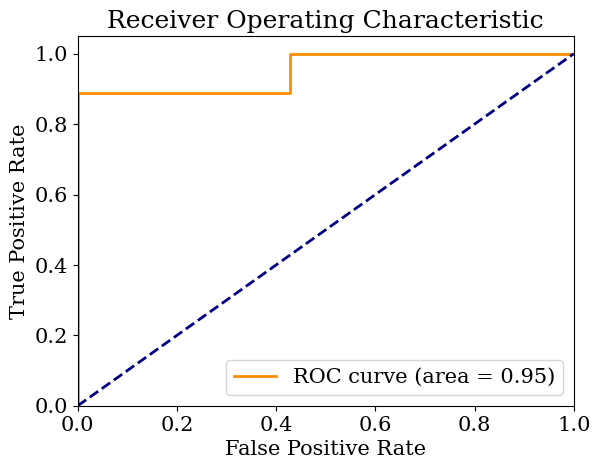

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Predict probabilities for the test data
y_probs = model.predict(X_test)

# Compute the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label=1)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the trained model

In [20]:
# Save the model
model.save('Iris_TwoLayer_NN.h5')

/home/infinitive/anaconda3/envs/stream/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Saving the standard scaler

In [21]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the Encoder for the label

In [22]:
import pickle
# Save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Loading the model, standardScaler, and Encoder

In [23]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('Iris_TwoLayer_NN.h5')

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

with open('encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

# Make a Prediction using Loaded Model

In [24]:
# This is your new data
new_data = np.array([[5.5, 2.6, 1.0, 0.7]])

In [25]:
# Make a prediction
predictions = loaded_model.predict(new_data)
print(predictions)
# Convert probabilities to class labels
class_labels = np.argmax(predictions, axis=1)

print(class_labels)
# The predictions are in the encoded format, use inverse_transform to decode them
decoded_predictions = loaded_encoder.inverse_transform(class_labels)

print(decoded_predictions)


1/1 [==============================] - 0s 34ms/step
[[0.6209114  0.11616205 0.26292655]]
[0]
['Iris-setosa']


# Visualizing the model

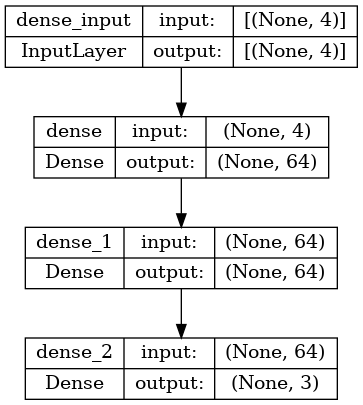

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
